In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

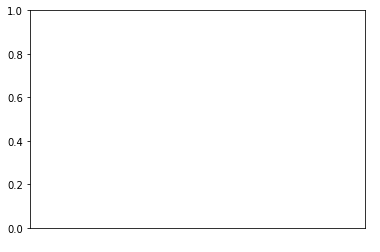

In [12]:
fig,ax=plt.subplots()

ax1=ax.twinx()
ax.axis('off')
ax1.yaxis.tick_left()